<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install keras_adversarial

In [32]:
import keras
keras.__version__

'2.1.2'

In [ ]:
pip install keras==2.1.2

In [ ]:
!pip install tensorflow==1.2

### O componente keras_adversarial funciona penas no Keras 2.1.2 e no tensorflow 1.2



In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Reshape
from keras.regularizers import L1L2
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

*pip install --updgrade keras, volta a versão atual.*

In [34]:
(previsores_treinamento, _), (_,_) = mnist.load_data()
previsores_treinamento.shape

(60000, 28, 28)

In [35]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_treinamento

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Criação das redes neurais

### Gerador

In [36]:
gerador = Sequential()

gerador.add(Dense(units = 500, 
                  input_dim = 100, 
                  activation = 'relu',
                  kernel_regularizer = L1L2(1e-5, 1e-5)))# 1e-5, 1e-5 definido na documentação 

gerador.add(Dense(units = 500, 
                  input_dim = 100, 
                  activation = 'relu',
                  kernel_regularizer = L1L2(1e-5, 1e-5)))

gerador.add(Dense(units = 784, 
                  activation = 'sigmoid', 
                  kernel_regularizer = L1L2(1e-5, 1e-5)))# 28 * 28

gerador.add(Reshape((28,28)))

### Discriminador

In [37]:
discriminador = Sequential()

discriminador.add(InputLayer(input_shape = (28,28))) # camada de entrada

discriminador.add(Flatten())

discriminador.add(Dense(units = 500, 
                        activation = 'relu', 
                        kernel_regularizer = L1L2(1e-5, 1e-5)))

discriminador.add(Dense(units = 500, 
                        activation = 'relu', 
                        kernel_regularizer = L1L2(1e-5, 1e-5)))

discriminador.add(Dense(units = 1, 
                        activation = 'sigmoid', 
                        kernel_regularizer = L1L2(1e-5, 1e-5)))

In [38]:
gan = simple_gan(gerador, discriminador, normal_latent_sampling((100,)))# valor igual ao input_dim do gerador

In [39]:
model = AdversarialModel(base_model = gan,
                         player_params = [gerador.trainable_weights,
                                          discriminador.trainable_weights])

In [40]:
model.adversarial_compile(adversarial_optimizer = AdversarialOptimizerSimultaneous,
                          player_optimizers = ['adam', 'adam'],
                          loss = 'binary_crossentropy')

In [ ]:
model.fit(x = previsores_treinamento, 
          y = gan_targets(60000), epochs = 1, batch_size = 256)

In [42]:
amostras = np.random.normal(size = (10,100))
previsao = gerador.predict(amostras)
previsao.shape

(10, 28, 28)

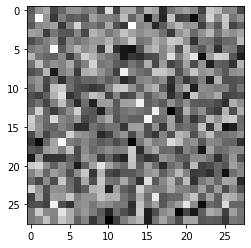

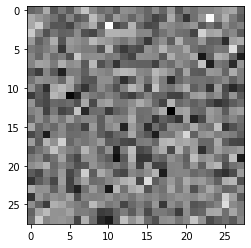

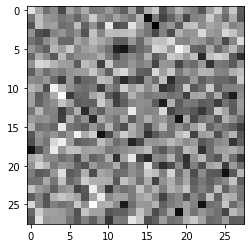

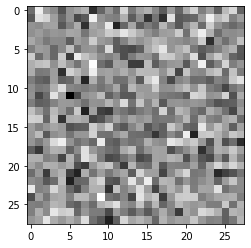

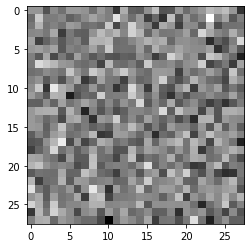

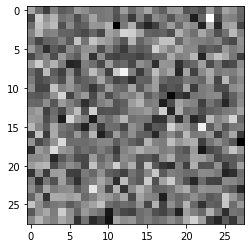

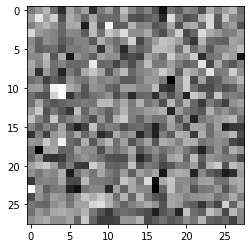

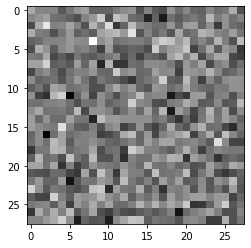

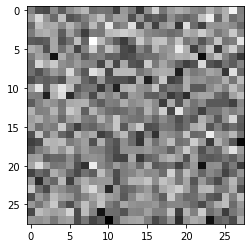

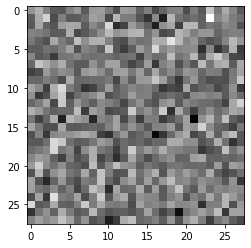

In [43]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :], cmap = 'gray')
  plt.show()